# 尤度函数のプロット

黒木玄

2019-09-17

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#n-=-16,-64,-...,-16384" data-toc-modified-id="n-=-16,-64,-...,-16384-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>n = 16, 64, ..., 16384</a></span><ul class="toc-item"><li><span><a href="#(0.5,-0.1)-near-singular" data-toc-modified-id="(0.5,-0.1)-near-singular-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>(0.5, 0.1) near singular</a></span></li><li><span><a href="#(0.5,-0.5)-regular" data-toc-modified-id="(0.5,-0.5)-regular-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>(0.5, 0.5) regular</a></span></li><li><span><a href="#(0.5,-0.0)-singular" data-toc-modified-id="(0.5,-0.0)-singular-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>(0.5, 0.0) singular</a></span></li><li><span><a href="#(0.5,-4.0)--very-regular" data-toc-modified-id="(0.5,-4.0)--very-regular-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>(0.5, 4.0)  very regular</a></span></li></ul></li><li><span><a href="#n-=-256" data-toc-modified-id="n-=-256-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>n = 256</a></span></li></ul></div>

In [1]:
using Distributions
using Plots
gr(size=(400, 250), titlefontsize=10, fmt=:png)
using Random

In [2]:
p(x, a, b) = exp(logp(x, a, b))
logp(x, a, b) = -x^2/2 - log(√(2π)) + log((1-a) + a*exp(b*x - b^2/2))
loglik(X, a, b) = sum(logp(x, a, b) for x in X)
mixnormal(a, b) = MixtureModel([Normal(), Normal(b, 1.0)], [1-a, a])

function plot_lik(a₀, b₀, n; seed=4649, alim=(0, 1), blim=(-1, 2), kwargs...)
    Random.seed!(seed)
    dist_true = mixnormal(a₀, b₀)
    X = rand(dist_true, n)
    L(a, b) = loglik(X, a, b)
    a = range(alim..., length=100)
    b = range(blim..., length=200)
    @time z = L.(a, b')
    zmax = maximum(z)
    idx = findmax(z)[2]
    w = @. exp(z - zmax) # is very important!
    plot!(; title="\$n = $n,\\quad (a_0, b_0) = ($(a₀), $(b₀))\$")
    plot!(; xlabel="\$b\$", ylabel="\$a\$")
    heatmap!(b, a, w; colorbar=false)
    scatter!([b₀], [a₀]; markersize=4, markerstrokewidth=0, color=:cyan, label="true")
    scatter!([b[idx[2]]], [a[idx[1]]]; markersize=5, markershape=:star, color=:lightgreen, label="MLE")
    plot!(; xlim=extrema(b), ylim=extrema(a))
    plot!(; kwargs...)
end

plot_lik (generic function with 1 method)

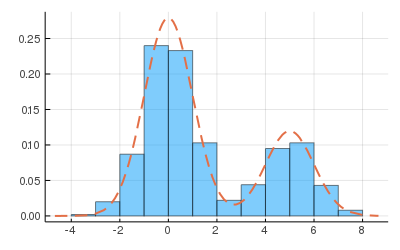

In [3]:
Random.seed!(4649)
histogram(rand(mixnormal(0.3, 5), 1000), bin=20, normed=true, legend=false, alpha=0.5)
plot!(x->p(x, 0.3, 5), lw=2, ls=:dash, size=(400, 250))

## n = 16, 64, ..., 16384

### (0.5, 0.1) near singular

In [4]:
a₀, b₀ = 0.5, 0.1

(0.5, 0.1)

  0.013500 seconds (20.00 k allocations: 781.328 KiB)


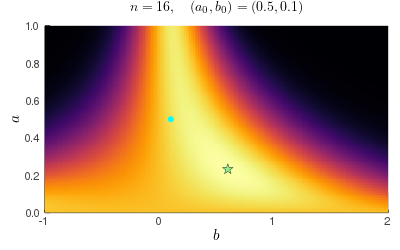

In [5]:
plot_lik(a₀, b₀, 2^4)

  0.104121 seconds (20.00 k allocations: 781.328 KiB)


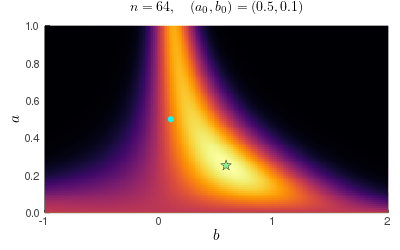

In [6]:
plot_lik(a₀, b₀, 2^6)

  0.338015 seconds (20.00 k allocations: 781.328 KiB)


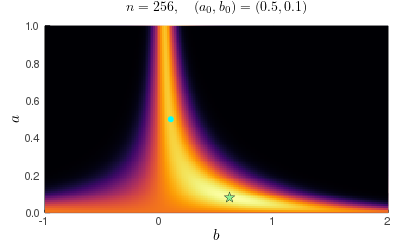

In [7]:
plot_lik(a₀, b₀, 2^8)

  1.109742 seconds (20.00 k allocations: 781.328 KiB)


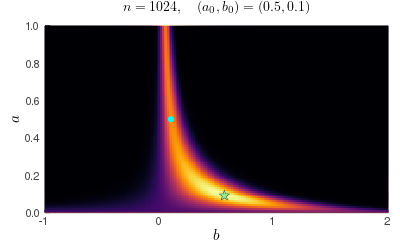

In [8]:
plot_lik(a₀, b₀, 2^10)

  4.266699 seconds (20.00 k allocations: 781.328 KiB)


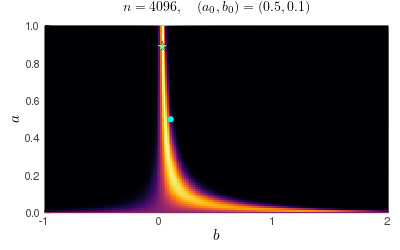

In [9]:
plot_lik(a₀, b₀, 2^12)

 17.120809 seconds (20.00 k allocations: 781.328 KiB)


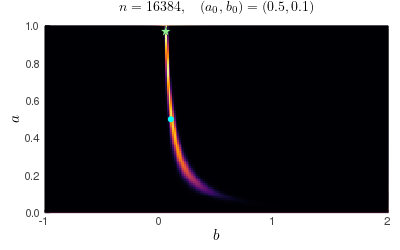

In [10]:
plot_lik(a₀, b₀, 2^14)

### (0.5, 0.5) regular

In [11]:
a₁, b₁ = 0.5, 0.5

(0.5, 0.5)

  0.020901 seconds (20.00 k allocations: 781.328 KiB)


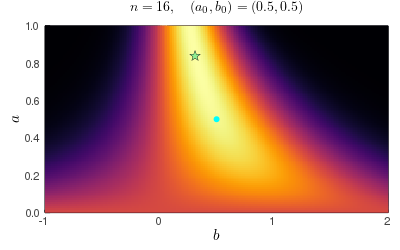

In [12]:
plot_lik(a₁, b₁, 2^4)

  0.066380 seconds (20.00 k allocations: 781.328 KiB)


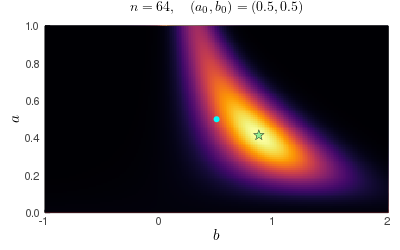

In [13]:
plot_lik(a₁, b₁, 2^6)

  0.364255 seconds (20.00 k allocations: 781.328 KiB)


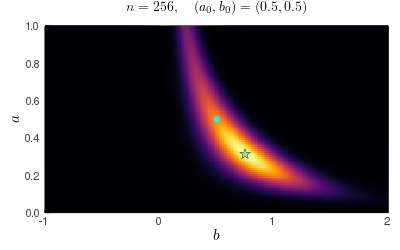

In [14]:
plot_lik(a₁, b₁, 2^8)

  1.239581 seconds (20.00 k allocations: 781.328 KiB)


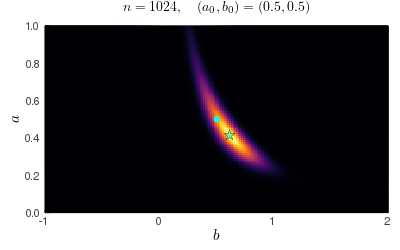

In [15]:
plot_lik(a₁, b₁, 2^10)

  4.981047 seconds (20.00 k allocations: 781.328 KiB)


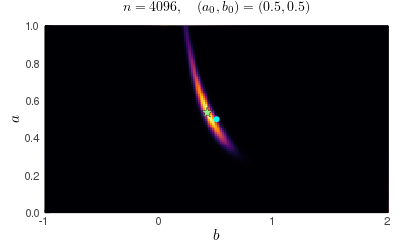

In [16]:
plot_lik(a₁, b₁, 2^12)

 17.996104 seconds (20.00 k allocations: 781.328 KiB)


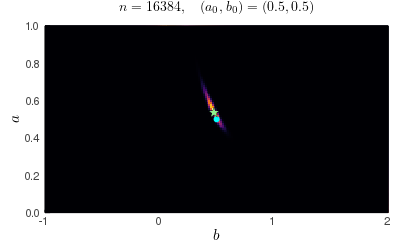

In [17]:
plot_lik(a₁, b₁, 2^14)

### (0.5, 0.0) singular

In [18]:
a₂, b₂ = 0.5, 0.0

(0.5, 0.0)

  0.013334 seconds (20.00 k allocations: 781.328 KiB)


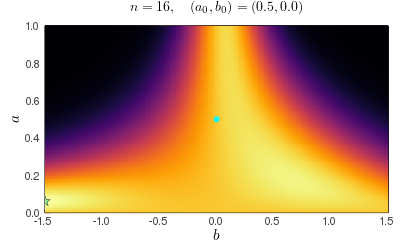

In [19]:
plot_lik(a₂, b₂, 2^4; blim=(-1.5, 1.5))

  0.055131 seconds (20.00 k allocations: 781.328 KiB)


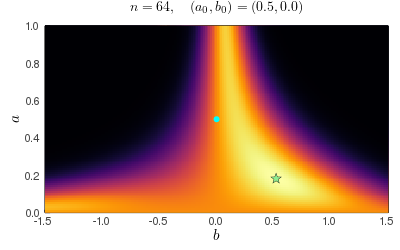

In [20]:
plot_lik(a₂, b₂, 2^6; blim=(-1.5, 1.5))

  0.374920 seconds (20.00 k allocations: 781.328 KiB)


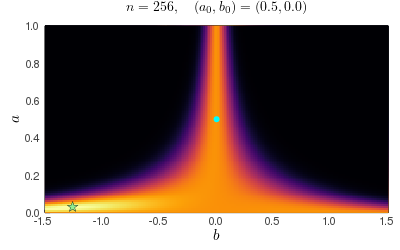

In [21]:
plot_lik(a₂, b₂, 2^8; blim=(-1.5, 1.5))

  1.005067 seconds (20.00 k allocations: 781.328 KiB)


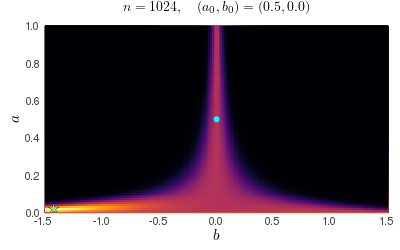

In [22]:
plot_lik(a₂, b₂, 2^10; blim=(-1.5, 1.5))

  4.567701 seconds (20.00 k allocations: 781.328 KiB)


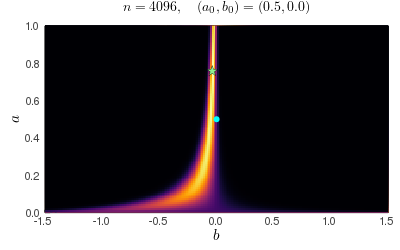

In [23]:
plot_lik(a₂, b₂, 2^12; blim=(-1.5, 1.5))

 17.847940 seconds (20.00 k allocations: 781.328 KiB)


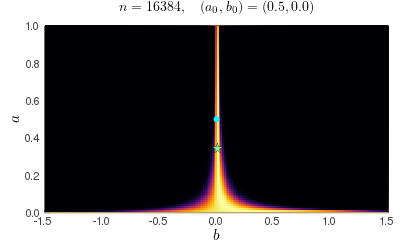

In [24]:
plot_lik(a₂, b₂, 2^14; blim=(-1.5, 1.5))

### (0.5, 4.0)  very regular

In [25]:
a₃, b₃ = 0.5, 4.0

(0.5, 4.0)

  0.017598 seconds (20.00 k allocations: 781.328 KiB)


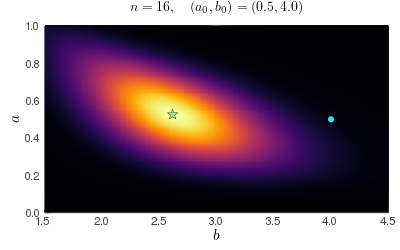

In [26]:
plot_lik(a₃, b₃, 2^4; alim=(0, 1), blim=(1.5, 4.5))

  0.089589 seconds (20.00 k allocations: 781.328 KiB)


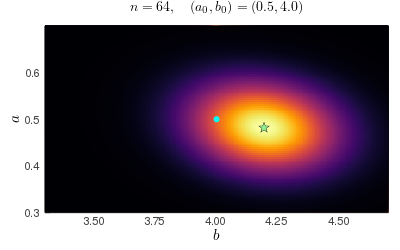

In [27]:
plot_lik(a₃, b₃, 2^6; alim=(0.3, 0.7), blim=(3.3, 4.7))

  0.293959 seconds (20.00 k allocations: 781.328 KiB)


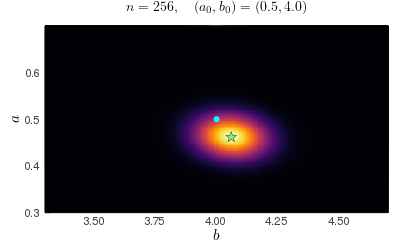

In [28]:
plot_lik(a₃, b₃, 2^8; alim=(0.3, 0.7), blim=(3.3, 4.7))

  1.169964 seconds (20.00 k allocations: 781.328 KiB)


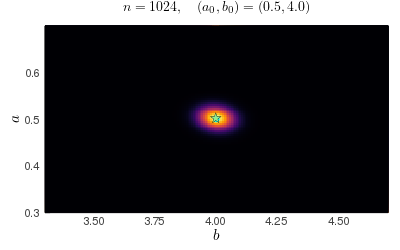

In [29]:
plot_lik(a₃, b₃, 2^10; alim=(0.3, 0.7), blim=(3.3, 4.7))

  5.028237 seconds (20.00 k allocations: 781.328 KiB)


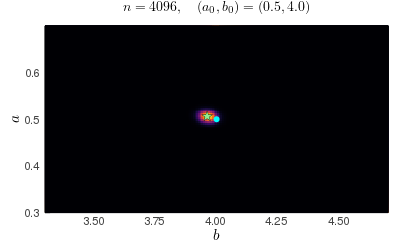

In [30]:
plot_lik(a₃, b₃, 2^12; alim=(0.3, 0.7), blim=(3.3, 4.7))

 19.372460 seconds (20.00 k allocations: 781.328 KiB)


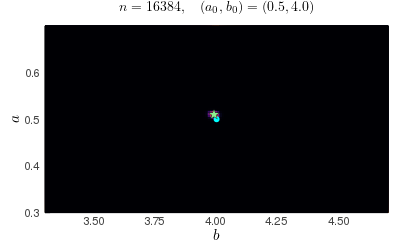

In [31]:
plot_lik(a₃, b₃, 2^14; alim=(0.3, 0.7), blim=(3.3, 4.7))

## n = 256

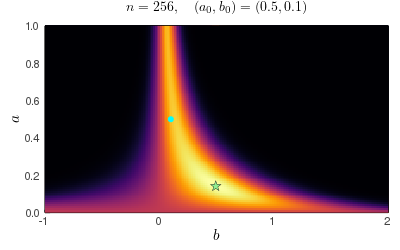

  0.303600 seconds (20.00 k allocations: 781.328 KiB)

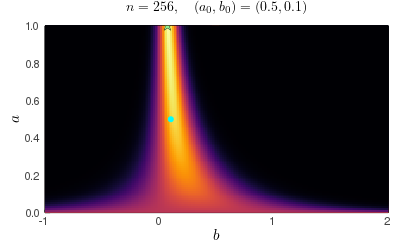


  0.241938 seconds (20.00 k allocations: 781.328 KiB)

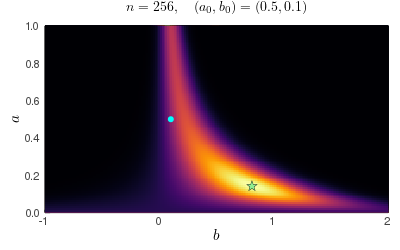


  0.228130 seconds (20.00 k allocations: 781.328 KiB)


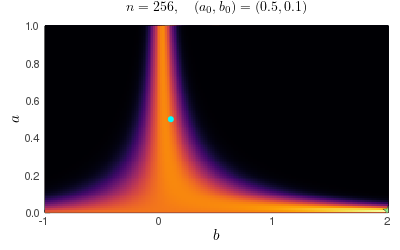

  0.261439 seconds (20.00 k allocations: 781.328 KiB)


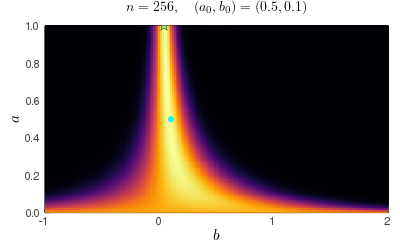

  0.262379 seconds (20.00 k allocations: 781.328 KiB)


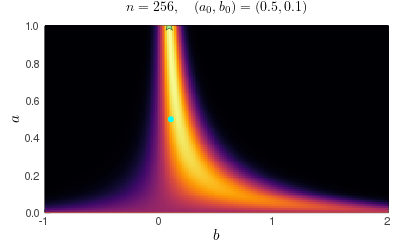

  0.246523 seconds (20.00 k allocations: 781.328 KiB)


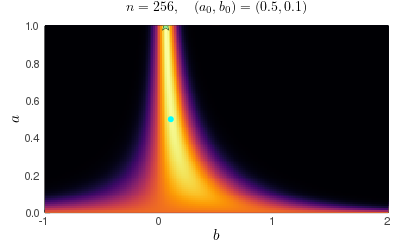

  0.248139 seconds (20.00 k allocations: 781.328 KiB)


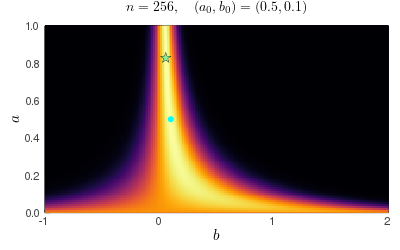

  0.234092 seconds (20.00 k allocations: 781.328 KiB)

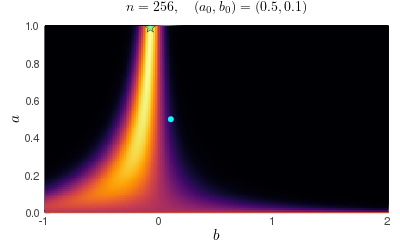


  0.318391 seconds (20.00 k allocations: 781.328 KiB)


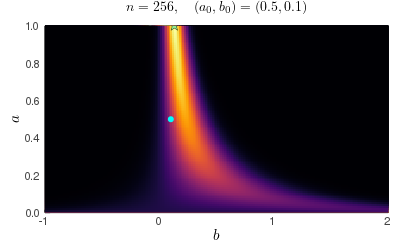

  0.229317 seconds (20.00 k allocations: 781.328 KiB)


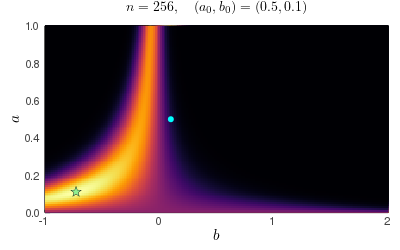

  0.244684 seconds (20.00 k allocations: 781.328 KiB)


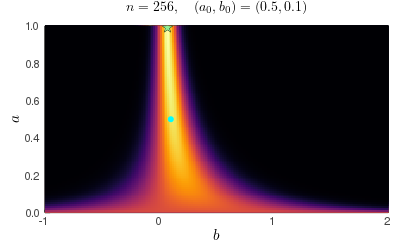

  0.288282 seconds (20.00 k allocations: 781.328 KiB)

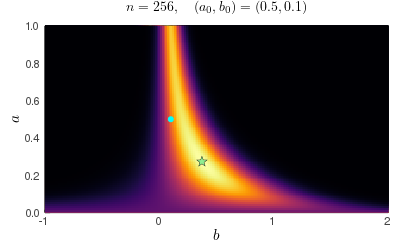


  0.228168 seconds (20.00 k allocations: 781.328 KiB)


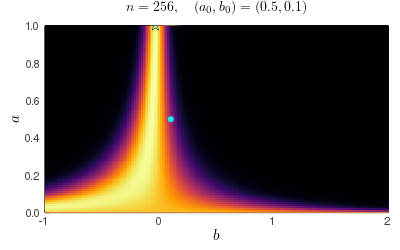

  0.242382 seconds (20.00 k allocations: 781.328 KiB)


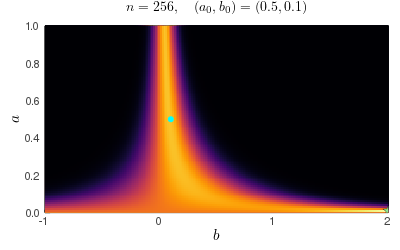

  0.330080 seconds (20.00 k allocations: 781.328 KiB)


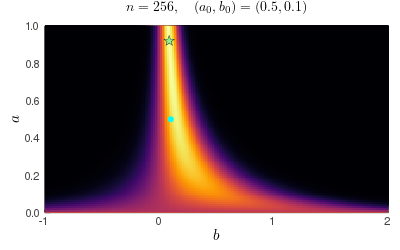

  0.291749 seconds (20.00 k allocations: 781.328 KiB)


In [32]:
for i in 1:16
    plot_lik(a₀, b₀, 2^8; seed=rand(UInt)) |> display
end

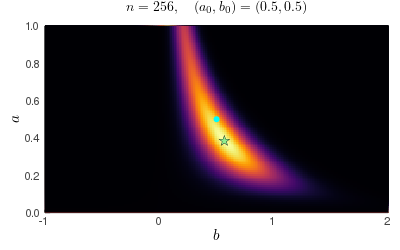

  0.246864 seconds (20.00 k allocations: 781.328 KiB)


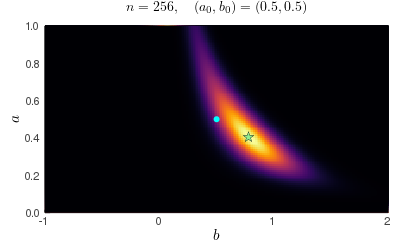

  0.251892 seconds (20.00 k allocations: 781.328 KiB)

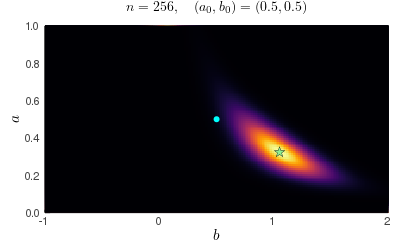


  0.260766 seconds (20.00 k allocations: 781.328 KiB)

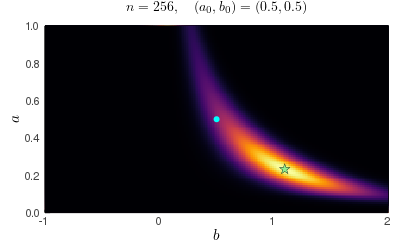


  0.266975 seconds (20.00 k allocations: 781.328 KiB)


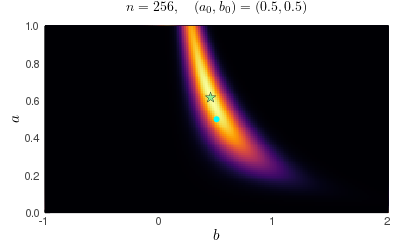

  0.229566 seconds (20.00 k allocations: 781.328 KiB)

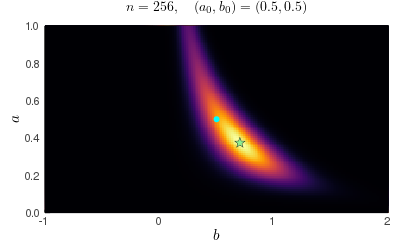


  0.253470 seconds (20.00 k allocations: 781.328 KiB)


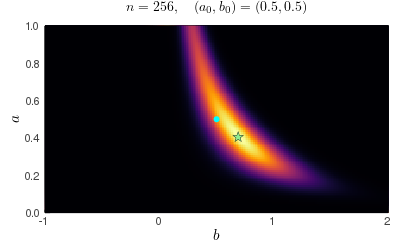

  0.288745 seconds (20.00 k allocations: 781.328 KiB)

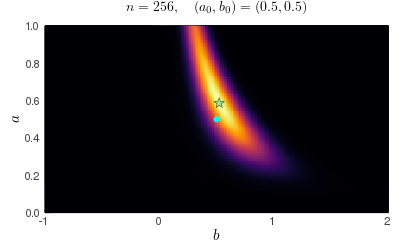


  0.251201 seconds (20.00 k allocations: 781.328 KiB)


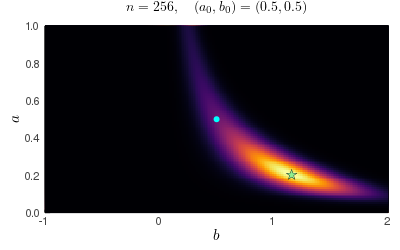

  0.264744 seconds (20.00 k allocations: 781.328 KiB)


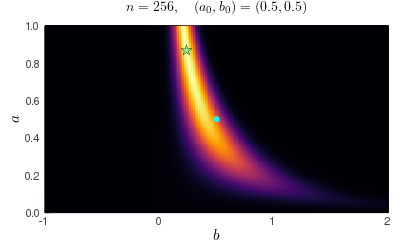

  0.263986 seconds (20.00 k allocations: 781.328 KiB)


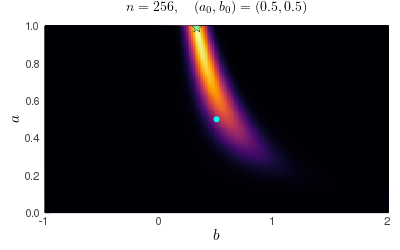

  0.311796 seconds (20.00 k allocations: 781.328 KiB)


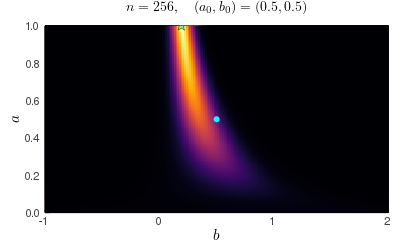

  0.253692 seconds (20.00 k allocations: 781.328 KiB)


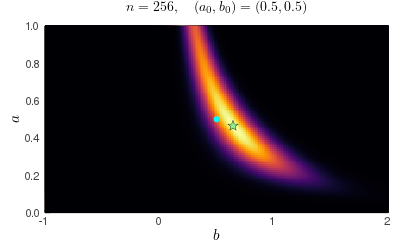

  0.259472 seconds (20.00 k allocations: 781.328 KiB)


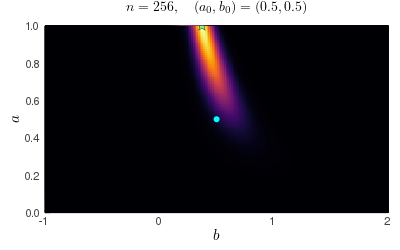

  0.251715 seconds (20.00 k allocations: 781.328 KiB)

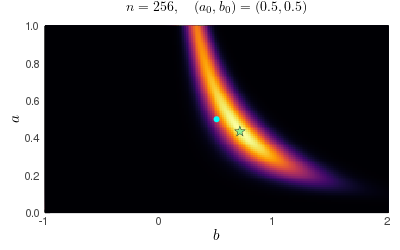


  0.239665 seconds (20.00 k allocations: 781.328 KiB)


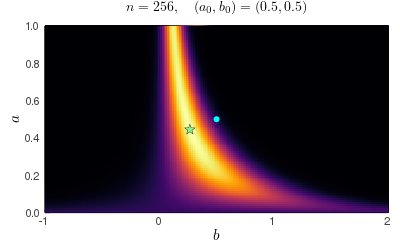

  0.241102 seconds (20.00 k allocations: 781.328 KiB)


In [33]:
for i in 1:16
    plot_lik(a₁, b₁, 2^8; seed=rand(UInt)) |> display
end

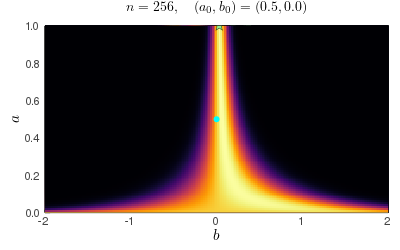

  0.270926 seconds (20.00 k allocations: 781.328 KiB)


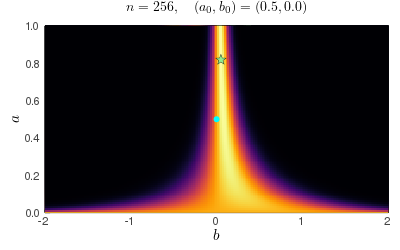

  0.269613 seconds (20.00 k allocations: 781.328 KiB, 1.44% gc time)


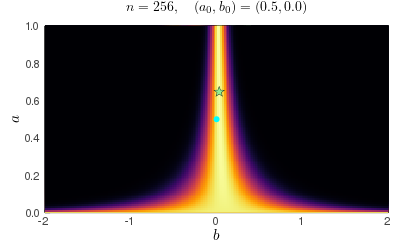

  0.259500 seconds (20.00 k allocations: 781.328 KiB)


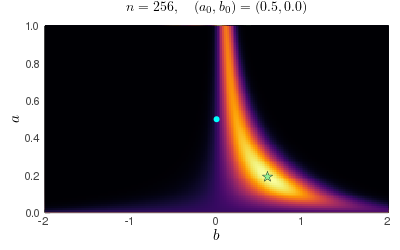

  0.235243 seconds (20.00 k allocations: 781.328 KiB)


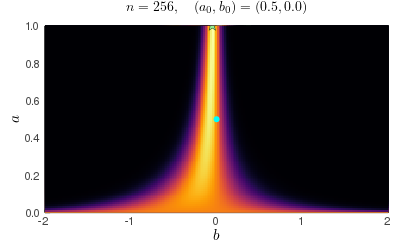

  0.253998 seconds (20.00 k allocations: 781.328 KiB)

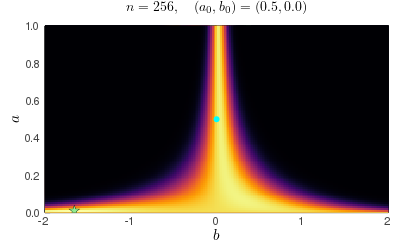


  0.252036 seconds (20.00 k allocations: 781.328 KiB)


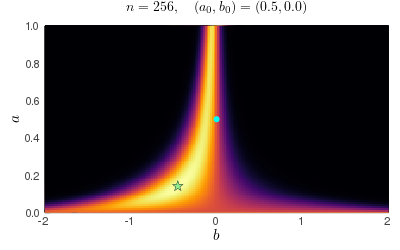

  0.255055 seconds (20.00 k allocations: 781.328 KiB)

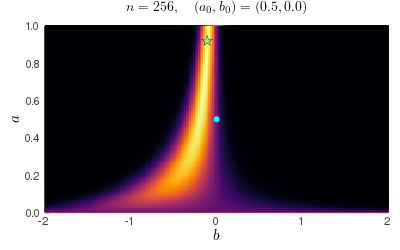


  0.239113 seconds (20.00 k allocations: 781.328 KiB)


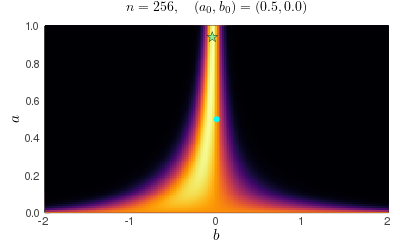

  0.238459 seconds (20.00 k allocations: 781.328 KiB)

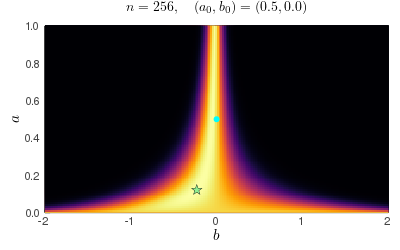


  0.241639 seconds (20.00 k allocations: 781.328 KiB)


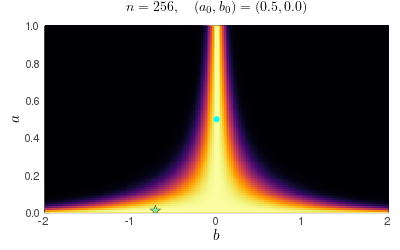

  0.252583 seconds (20.00 k allocations: 781.328 KiB)


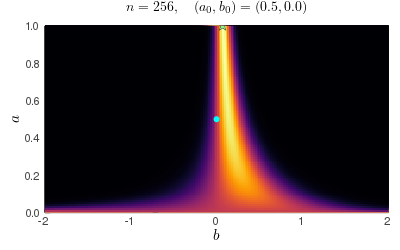

  0.347682 seconds (20.00 k allocations: 781.328 KiB)


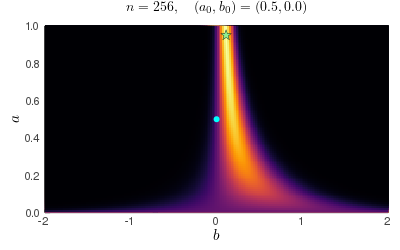

  0.238927 seconds (20.00 k allocations: 781.328 KiB)


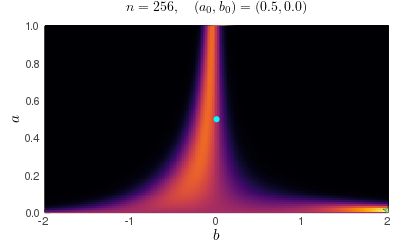

  0.366875 seconds (20.00 k allocations: 781.328 KiB)


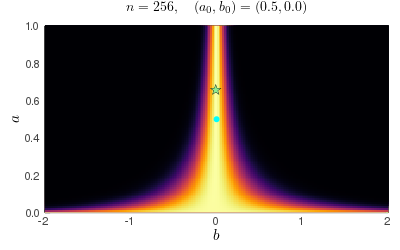

  0.232296 seconds (20.00 k allocations: 781.328 KiB)

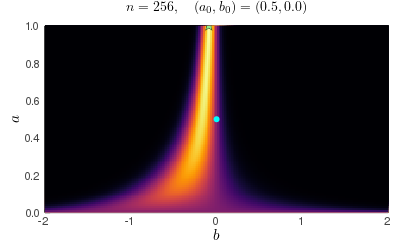


  0.249995 seconds (20.00 k allocations: 781.328 KiB)


In [34]:
for i in 1:16
    plot_lik(a₂, b₂, 2^8; blim=(-2, 2), seed=rand(UInt)) |> display
end

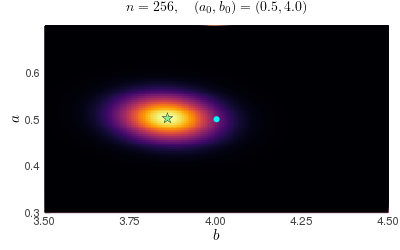

  0.273465 seconds (20.00 k allocations: 781.328 KiB)

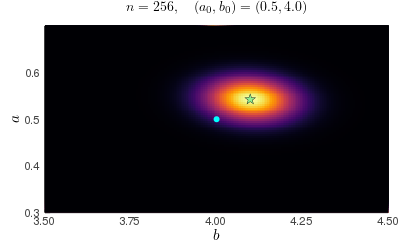


  0.320394 seconds (20.00 k allocations: 781.328 KiB)

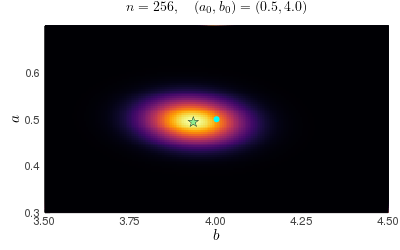


  0.319970 seconds (20.00 k allocations: 781.328 KiB)

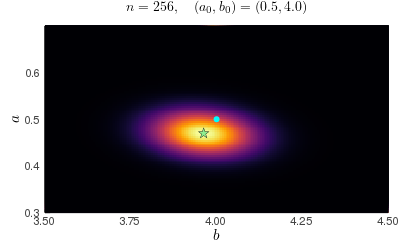


  0.338544 seconds (20.00 k allocations: 781.328 KiB)


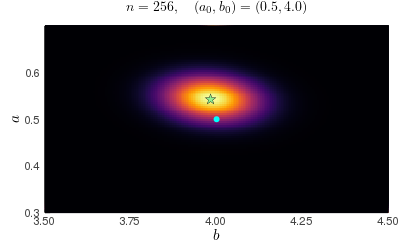

  0.306399 seconds (20.00 k allocations: 781.328 KiB)

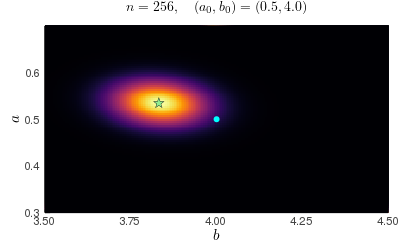


  0.274900 seconds (20.00 k allocations: 781.328 KiB)


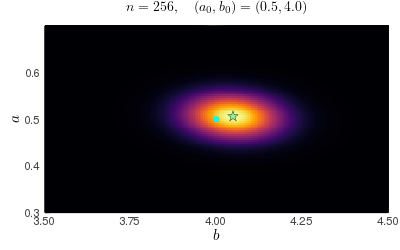

  0.280288 seconds (20.00 k allocations: 781.328 KiB)

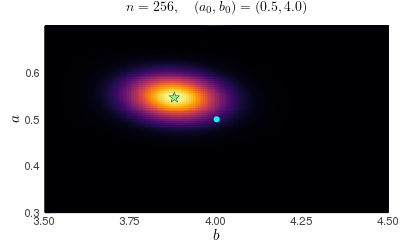


  0.355214 seconds (20.00 k allocations: 781.328 KiB)

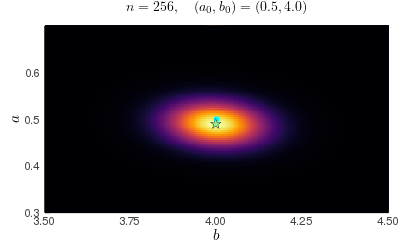


  0.341482 seconds (20.00 k allocations: 781.328 KiB)


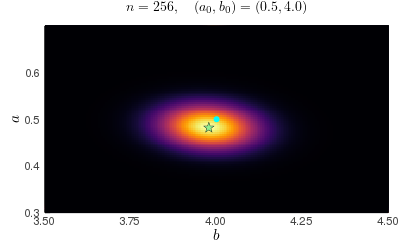

  0.279865 seconds (20.00 k allocations: 781.328 KiB)


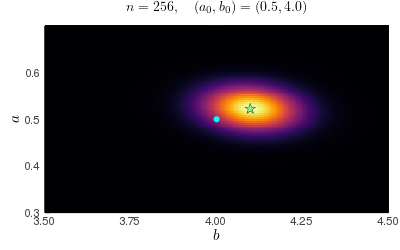

  0.271691 seconds (20.00 k allocations: 781.328 KiB)


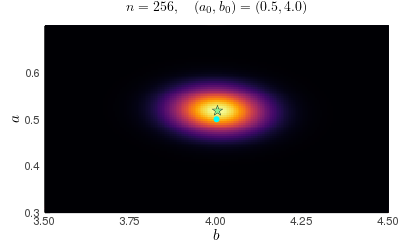

  0.301054 seconds (20.00 k allocations: 781.328 KiB)

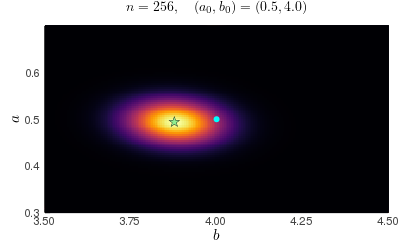


  0.273222 seconds (20.00 k allocations: 781.328 KiB)


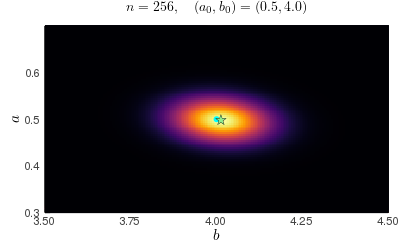

  0.260199 seconds (20.00 k allocations: 781.328 KiB)


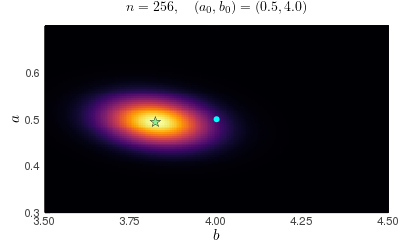

  0.376381 seconds (20.00 k allocations: 781.328 KiB)


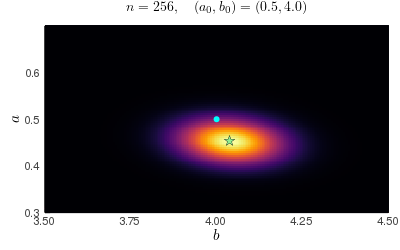

  0.278655 seconds (20.00 k allocations: 781.328 KiB)


In [35]:
for i in 1:16
    plot_lik(a₃, b₃, 2^8; alim=(0.3, 0.7), blim=(3.5, 4.5), seed=rand(UInt)) |> display
end